In [11]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from psi_praktikum.__main__ import *
from tabulate import tabulate


def show(parameters: list):
    keys = [
        "blur_sigma",
        "time_shift",
        "normalization",
        "t_mu",
        "t_pi"
    ]
    print(tabulate(dict(zip(keys,parameters))))

## Find the parameters of the fit between TDC bin numbers and times.

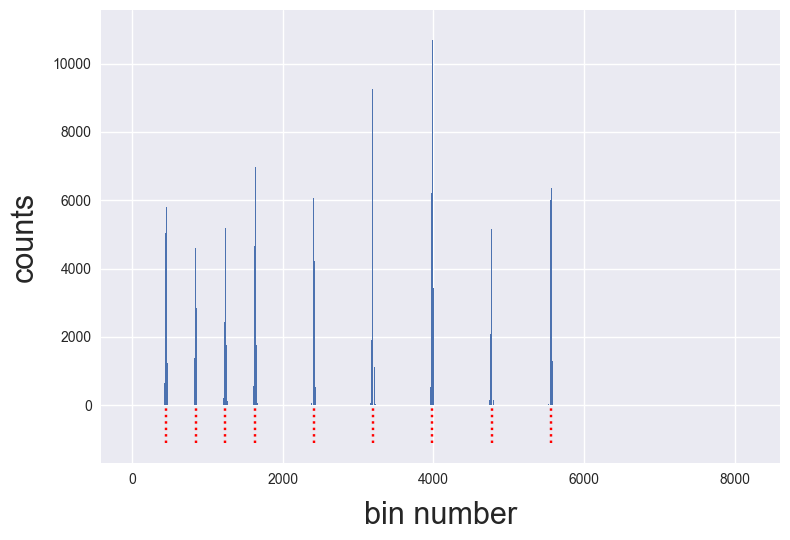

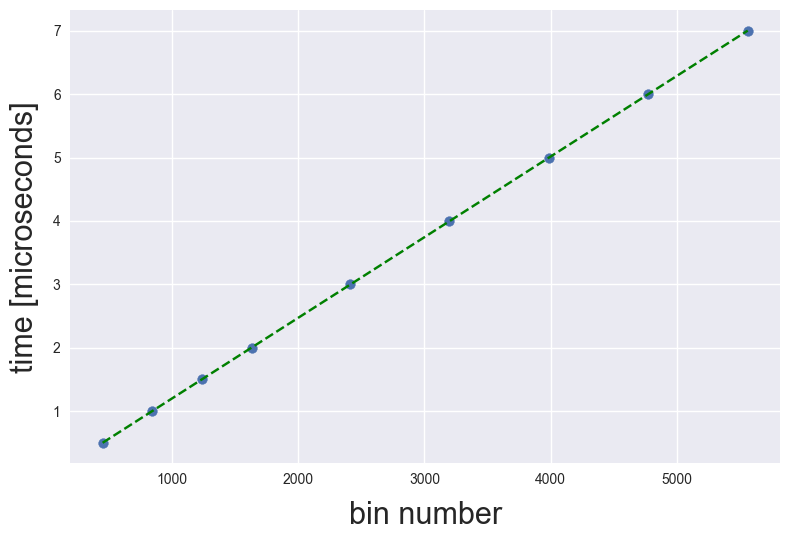

The parameters are [p_1, p_2]=[ 0.00127266 -0.07273329]


In [13]:
parameters = fit_calibration(
    "TimeCalibration_delaytrigger_05to7us.Spe",
    # "TimeCalibration_stepof32ns.Spe",
    times = [
        0.5,
        1,
        1.5,
        2,
        3,
        4,
        5,
        6,
        7,
    ],
    visualize=True,
)

print(f"The parameters are [p_1, p_2]={parameters}")

In [14]:
BOUNDS=(
    (0., 100),  # time gaus sigma
    (0, 5e-6),  # t0
    (0., 100),  # N0
    (0., 1e-5),  # t_mu
    (0., 1e-5),  # t_pi
)

## Test the fit on a simulated distribution

/Users/max/repos/uzh/psi-praktikum/psi_praktikum/__main__.py:117: RuntimeWarning: divide by zero encountered in divide
  - pexp(- (t_shifted / t_pi))
/Users/max/repos/uzh/psi-praktikum/psi_praktikum/__main__.py:117: RuntimeWarning: invalid value encountered in divide
  - pexp(- (t_shifted / t_pi))
/Users/max/repos/uzh/psi-praktikum/psi_praktikum/__main__.py:116: RuntimeWarning: divide by zero encountered in divide
  pexp(- (t_shifted / t_mu))
/Users/max/repos/uzh/psi-praktikum/psi_praktikum/__main__.py:116: RuntimeWarning: invalid value encountered in divide
  pexp(- (t_shifted / t_mu))
/opt/homebrew/Caskroom/miniforge/base/envs/psi-praktikum/lib/python3.10/site-packages/scipy/ndimage/_filters.py:235: RuntimeWarning: divide by zero encountered in scalar divide
  phi_x = np.exp(-0.5 / sigma2 * x ** 2)
/opt/homebrew/Caskroom/miniforge/base/envs/psi-praktikum/lib/python3.10/site-packages/scipy/ndimage/_filters.py:235: RuntimeWarning: invalid value encountered in multiply
  phi_x = np.exp(

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: 10364.775924776706
       x: [ 1.393e+00  1.744e-06  5.708e+01  2.153e-06  3.434e-08]
     nit: 1000
    nfev: 21797
    njev: 1966
    nhev: 0


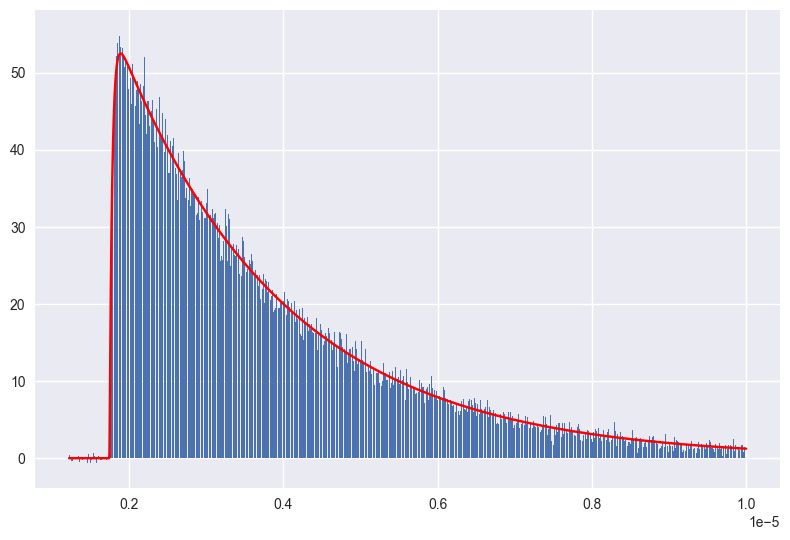

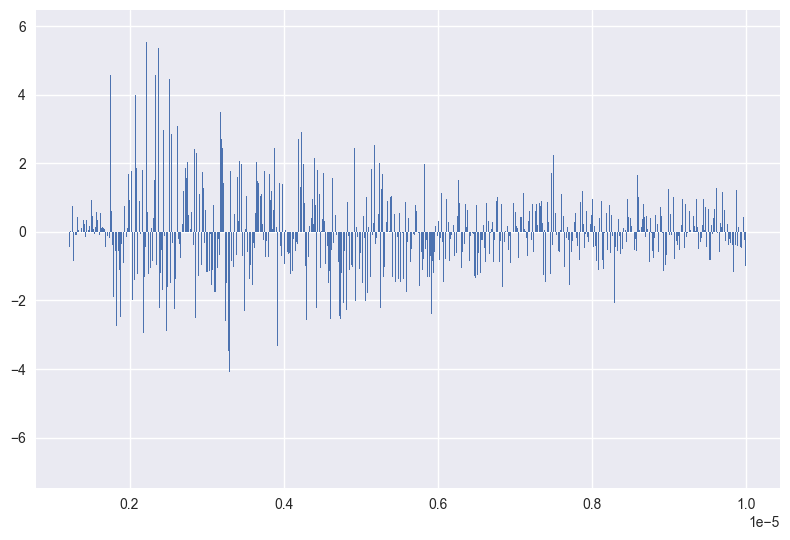

In [48]:
parameters = fit_simulated(
    fit_function=ff,
    bounds=BOUNDS
)


## Fit to the real data

/Users/max/repos/uzh/psi-praktikum/psi_praktikum/__main__.py:117: RuntimeWarning: divide by zero encountered in divide
  - pexp(- (t_shifted / t_pi))
/Users/max/repos/uzh/psi-praktikum/psi_praktikum/__main__.py:116: RuntimeWarning: divide by zero encountered in divide
  pexp(- (t_shifted / t_mu))


 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: 39347.117938800235
       x: [ 1.562e+01  1.463e-06  1.610e+01  2.192e-06  3.804e-08]
     nit: 1000
    nfev: 34709
    njev: 4118
    nhev: 0


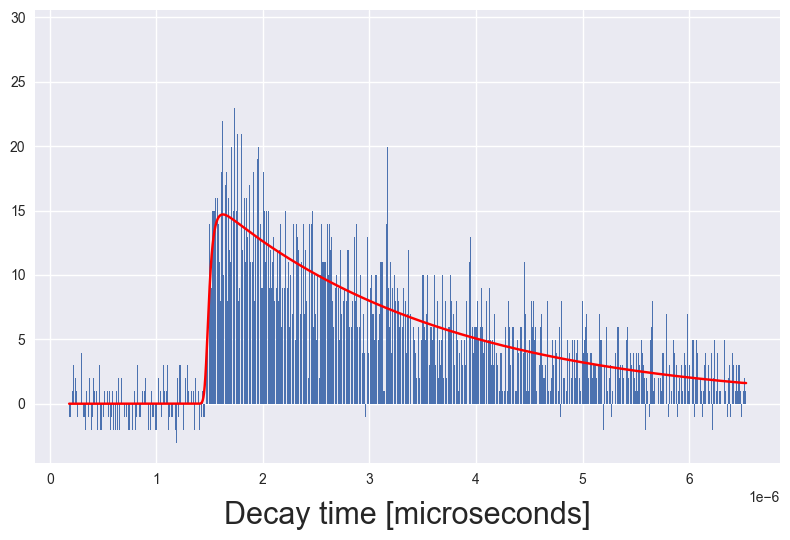

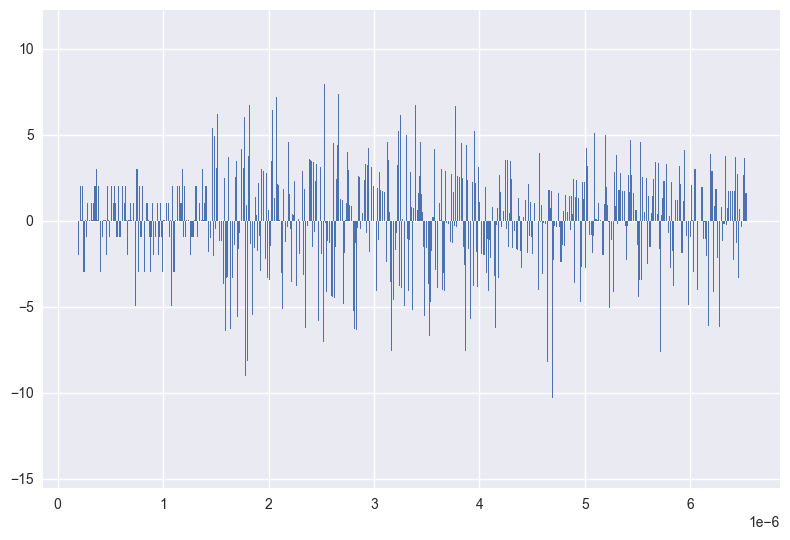

In [55]:
filename = "stop_S6andS7_delay_1_5_mus_fs12_50and100mm_30min.Spe"
parameters = fit_data(
    filename,
    fit_function=ff,
    bounds=BOUNDS
)

col1 = [filename, *parameters]


 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: 49188.18316928421
       x: [ 1.493e+01  1.467e-06  1.908e+01  2.258e-06  2.867e-08]
     nit: 1000
    nfev: 14705
    njev: 784
    nhev: 0


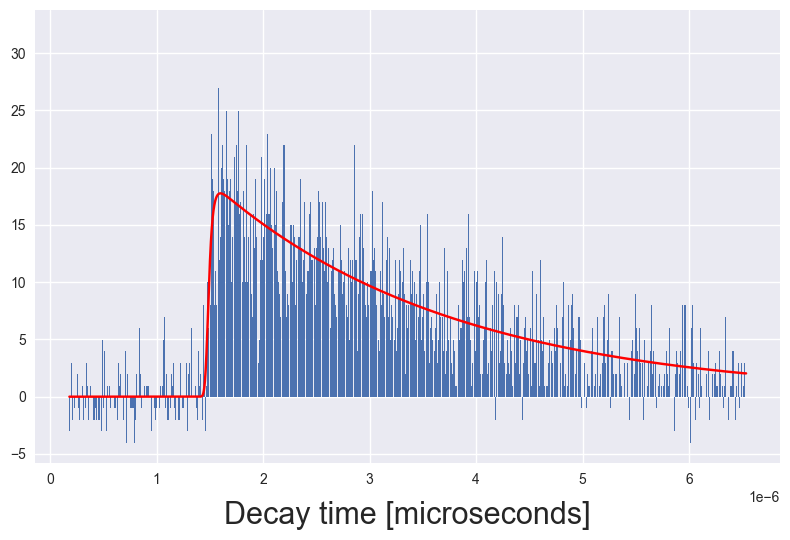

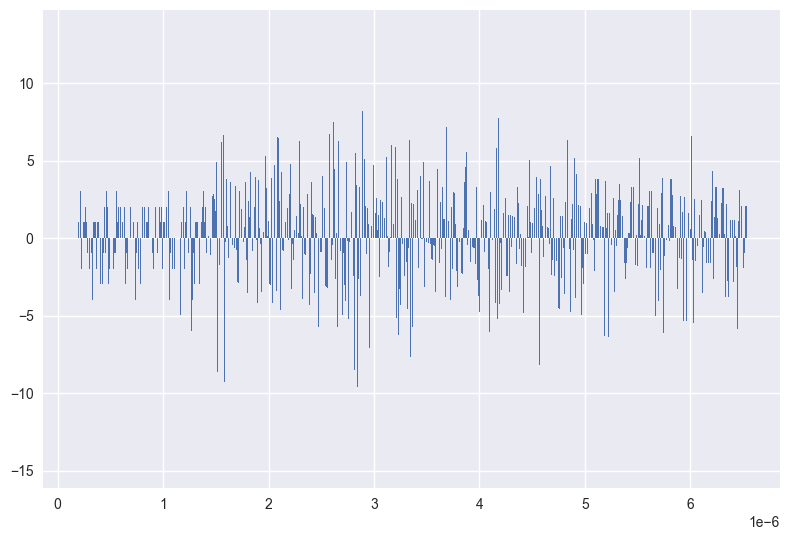

In [56]:
filename = "PSI_lab_2025/stop_S6andS7_delay_1_5_mus_fs12_135mm_60min_timinggivenbys7.Spe"
parameters = fit_data(
    filename,
    fit_function=ff,
    bounds=BOUNDS
)

col2 = [filename, *parameters]

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: 10814.06663610735
       x: [ 1.340e-01  1.430e-06  3.519e+00  1.852e-06  5.980e-08]
     nit: 1000
    nfev: 13355
    njev: 559
    nhev: 0


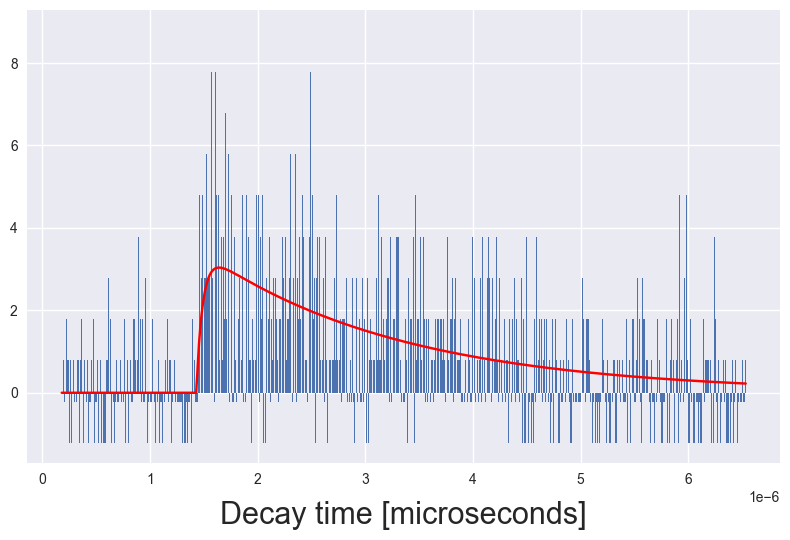

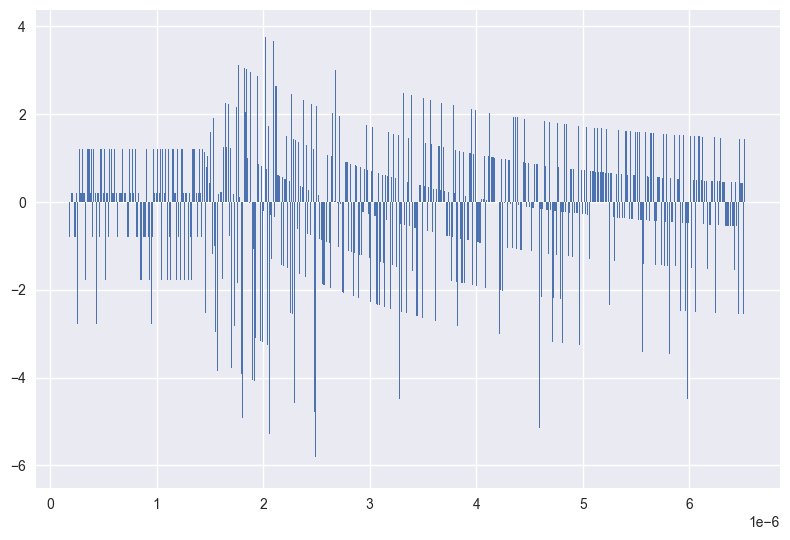

In [57]:

filename = "PSI_lab_2025/stop_S6andS7_delay_1_5_mus_fs12_135mm_timinggivenbys7_CFD_allstat.Spe"
parameters = fit_data(
    filename,
    fit_function=ff,
    bounds=BOUNDS
)

col3 = [filename, *parameters]

In [58]:
print(
    tabulate(
        [col1, col2, col3],
        headers=[
            "blur_sigma",
            "time_shift",
            "normalization",
            "t_mu",
            "t_pi"
        ],
    )
)

                                                                                      blur_sigma    time_shift    normalization         t_mu         t_pi
----------------------------------------------------------------------------------  ------------  ------------  ---------------  -----------  -----------
stop_S6andS7_delay_1_5_mus_fs12_50and100mm_30min.Spe                                   15.6196     1.46257e-06         16.1013   2.19242e-06  3.80443e-08
PSI_lab_2025/stop_S6andS7_delay_1_5_mus_fs12_135mm_60min_timinggivenbys7.Spe           14.9285     1.46712e-06         19.0822   2.25778e-06  2.86658e-08
PSI_lab_2025/stop_S6andS7_delay_1_5_mus_fs12_135mm_timinggivenbys7_CFD_allstat.Spe      0.134004   1.43049e-06          3.51939  1.85234e-06  5.9798e-08
